In [5]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import *
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
import datetime
%matplotlib inline

In [6]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [7]:
def clean_text(text):
    text= text.replace('mrs. ','')
    text= text.replace('mr. ','')
    text= text.replace('ms. ','')
    text= text.replace('dr. ','')
    text= text.replace('sen. ','')
    text= text.replace('Mrs. ','')
    return text


In [8]:
def to_datetime(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

In [9]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Hilary', 'Clinton', 'Rodham', 'Mrs.Clinton']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [10]:
hilary = pd.read_csv('data/hilary_scores.csv')
hilary['Sentiment'] = hilary.apply(lambda row: sentiment_new(row['Comment']), axis = 1)
neg = hilary[hilary['Sentiment'] < -0.1]
print len(neg)
pos = hilary[hilary['Sentiment'] > 0.2]
print len(pos)

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
/Users/datascientist/anaconda/lib/python2.7/site-packages/Pattern-2.6-py2.7.egg/pattern/text/__init__.py:2228: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in map(lambda e: e.lower(), e):


24983
980
1474


In [11]:
len(neg) + len(pos)

2454

In [232]:
vectorizer = TfidfVectorizer(stop_words='english')
list_ = [pos, neg]
examples = []
num_per_topics = []
topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    keyterms = []

    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))

    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

        keyterms.append(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

    num_per_topics.append(values)
    topics.append(keyterms)

pos_examples = examples[0]
neg_examples = examples[1]

##################################################
Topic #1:
president hillary woman america rodham
Topic #2:
email server private state information
Topic #3:
times coverage story ny page
Topic #4:
biden joe run clinton president
Topic #5:
sanders bernie hillary support clinton
Topic #6:
trump republican bush gop donald
Topic #7:
win election democratic nomination party
Topic #8:
nyt news sources story anonymous
Topic #9:
hilary bernie win like joe
Topic #10:
change mrs people black clinton
##################################################
Topic #1:
biden joe run president obama
Topic #2:
times story news coverage clinton
Topic #3:
black matter lives blm apology
Topic #4:
sanders bernie support hillary democrat
Topic #5:
clintons bushes sick tired barry
Topic #6:
republican party vote democratic candidate
Topic #7:
trump bush jeb donald hillary
Topic #8:
classified server email information state
Topic #9:
people clinton know like want
Topic #10:
crime violent law laws blow


In [235]:
pos1= list(izip(topics[0], pos_examples))
data_pos = pd.DataFrame(list(izip(pos1, num_per_topics[0])))
data_pos[['pos_keys', 'pos_ex']] = data_pos[0].apply(pd.Series)
data_pos.rename(columns={1:'pos_num'}, inplace=True)
data_pos.drop(0, axis = 1, inplace=True)

neg1= list(izip(topics[1], neg_examples))
data_neg = pd.DataFrame(list(izip(neg1, num_per_topics[1])))
data_neg[['neg_keys', 'neg_ex']] = data_neg[0].apply(pd.Series)
data_neg.rename(columns={1:'neg_num'}, inplace=True)
data_neg.drop(0, axis = 1, inplace=True)

comments = pd.concat([data_pos, data_neg], axis = 1)
comments['pos_keys'] = comments['pos_keys'].apply(lambda x : clean_text(x))
comments['neg_keys'] = comments['neg_keys'].apply(lambda x : clean_text(x))
comments.to_csv('data/hilary_topics.csv')

In [12]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Sanders', 'Bernie', 'Mr.Sanders']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [14]:
sanders = pd.read_csv('data/sanders_scores.csv')
sanders[pd.isnull(sanders['Comment'])] = ""

sanders['Sentiment'] = sanders.apply(lambda row: sentiment_new(row['Comment']), axis = 1)

sanders_neg = sanders[sanders['Sentiment'] < -0.1]
print len(sanders_neg)
sanders_pos = sanders[sanders['Sentiment'] > 0.1]
print len(sanders_pos)


239
1156


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


TypeError: Could not operate 1156 with block values unsupported operand type(s) for +: 'int' and 'str'

In [15]:
print len(sanders_pos) + len(sanders_neg)

1395


In [109]:
list_ = [sanders_pos, sanders_neg]
sanders_examples = []
num_per_topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)

    #print nmf.transform(V).shape
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    sanders_examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))
    
    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-10 -1:-1]]))
        numbers.append(np.count_nonzero(topic))
        
    num_per_topics.append(values)
    
sanders_pos_examples = sanders_examples[0]
sanders_neg_examples = sanders_examples[1]

##################################################
Topic #1:
vote primary ll election general bernie hope republican democratic voting
Topic #2:
love bernie sanders fight stands good believes agree 59 leader
Topic #3:
people tax class country american pay middle money social way
Topic #4:
win good lose want bernie luck don nomination sale sanders
Topic #5:
senator sanders mr good wish agree times america elected speak
Topic #6:
hillary clinton left sanders support bush obama republicans warren far
Topic #7:
candidate democratic candidates issues party voters republican campaign sanders media
Topic #8:
right need left america bernie people wing person puts sanders
Topic #9:
like bernie need fresh vermont stand air breath chance know
Topic #10:
president sanders running bernie run ticket person democratic socialist make
##################################################
Topic #1:
hillary clinton sanders issues just doesn ll good look make
Topic #2:
truth say guts reality senators sanders

In [111]:
num_per_topics[0]

[109, 86, 278, 127, 147, 253, 275, 130, 176, 167]

In [112]:
sanders_comments = pd.DataFrame(list(izip(sanders_pos_examples, sanders_neg_examples)))
sanders_comments.columns = ['sanders_pos_ex', 'sanders_neg_ex']
topics_num = pd.DataFrame(list(izip(num_per_topics[0],num_per_topics[1])))
topics_num.columns = ['Pos_num', 'Neg_num']
topics_num 
sanders_com_count = pd.concat([topics_num, sanders_comments], axis=1)
sanders_com_count.head()
sanders_com_count.to_csv('data/sanders_com_count.csv')


In [16]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Biden', 'Joe', 'Mr.Biden']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [18]:
biden = pd.read_csv('data/biden_scores.csv')
biden[pd.isnull(biden['Comment'])] = ""
biden['Sentiment'] = biden.apply(lambda row: sentiment_new(row['Comment']), axis = 1)

biden_neg = biden[biden['Sentiment'] < -0.1]
print len(biden_neg)
biden_pos = biden[biden['Sentiment'] > 0.2]
print len(biden_pos)
print len(biden_pos) + len(biden_neg)

271
966
1237


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [115]:
list_ = [biden_pos, biden_neg]
biden_examples = []
num_per_topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)

    #print nmf.transform(V).shape
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    biden_examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))
    
    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-10 -1:-1]]))
        numbers.append(np.count_nonzero(topic))
        
    num_per_topics.append(values)
biden_pos_examples = biden_examples[0]
biden_neg_examples = biden_examples[1]

##################################################
Topic #1:
sanders bernie clinton support help biden big issues elect socialist
Topic #2:
president vice great make biden candidate time mr clinton woman
Topic #3:
run love joe don biden welcome win chance far gaffs
Topic #4:
trump donald lifelong better biden dems look bush gop clown
Topic #5:
clinton democratic nomination party win candidate election biden campaign mrs
Topic #6:
vote republican choice voting won clinton bush probably candidates like
Topic #7:
good man mr biden politics honest live president legacy end
Topic #8:
like just don think people want really old know bush
Topic #9:
hillary race republicans time joe support candidate make democrats biden
Topic #10:
joe biden country beau obama best experience right vp family
##################################################
Topic #1:
democratic party run biden candidate trump polls candidates nomination democrats
Topic #2:
old middle sen feel demographics totally grief guy fem

In [119]:
biden_comments = pd.DataFrame(list(izip(biden_pos_examples, biden_neg_examples)))
biden_comments.columns = ['biden_pos_ex', 'biden_neg_ex']
topics_num = pd.DataFrame(list(izip(num_per_topics[0],num_per_topics[1])))
topics_num.columns = ['Pos_num', 'Neg_num']
topics_num 
biden_com_count = pd.concat([topics_num, biden_comments], axis=1)
biden_com_count.head()
biden_com_count.to_csv('data/biden_com_count.csv')


In [19]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Trump', 'Donald', 'Mr.Trump']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [20]:
trump = pd.read_csv('data/trump_scores.csv')
trump[pd.isnull(trump['Comment'])] = ""
trump['Sentiment'] = trump.apply(lambda row: sentiment_new(row['Comment']), axis = 1)

neg = trump[trump['Sentiment'] < -0.2]
print len(neg)
pos = trump[trump['Sentiment'] > 0.3]
print len(pos)
print len(pos) + len(neg)

2274
3269
5543


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [239]:
vectorizer = TfidfVectorizer(stop_words='english')
list_ = [pos, neg]
examples = []
num_per_topics = []
topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    keyterms = []

    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))

    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

        keyterms.append(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

    num_per_topics.append(values)
    topics.append(keyterms)

pos_examples = examples[0]
neg_examples = examples[1]

pos1= list(izip(topics[0], pos_examples))
data_pos = pd.DataFrame(list(izip(pos1, num_per_topics[0])))
data_pos[['pos_keys', 'pos_ex']] = data_pos[0].apply(pd.Series)
data_pos.rename(columns={1:'pos_num'}, inplace=True)
data_pos.drop(0, axis = 1, inplace=True)

neg1= list(izip(topics[1], neg_examples))
data_neg = pd.DataFrame(list(izip(neg1, num_per_topics[1])))
data_neg[['neg_keys', 'neg_ex']] = data_neg[0].apply(pd.Series)
data_neg.rename(columns={1:'neg_num'}, inplace=True)
data_neg.drop(0, axis = 1, inplace=True)

comments = pd.concat([data_pos, data_neg], axis = 1)
comments['pos_keys'] = comments['pos_keys'].apply(lambda x : clean_text(x))
comments['neg_keys'] = comments['neg_keys'].apply(lambda x : clean_text(x))
comments.to_csv('data/trump_topics.csv')

##################################################
Topic #1:
people like just think don
Topic #2:
mr trump bruni ramos brooks
Topic #3:
republican party trump republicans candidate
Topic #4:
donald great make america country
Topic #5:
hillary bush jeb clinton win
Topic #6:
media trump kelly debate news
Topic #7:
sanders bernie trump candidates brooks
Topic #8:
president trump good elected best
Topic #9:
gop trump candidate candidates party
Topic #10:
immigration illegal immigrants americans country
##################################################
Topic #1:
party republican base trump republicans
Topic #2:
illegal immigrants immigration americans legal
Topic #3:
ramos conference press trump questions
Topic #4:
women kelly megyn fox trump
Topic #5:
gop trump base candidates issue
Topic #6:
donald trump mccain wrong bad
Topic #7:
jeb bush clinton trump rubio
Topic #8:
sanders bernie hillary clinton media
Topic #9:
people trump like president just
Topic #10:
mr trump bruni blow americans

In [21]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Bush', 'Jeb', 'Mr.Bush']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [22]:
bush = pd.read_csv('data/bush_scores.csv')
bush[pd.isnull(bush['Comment'])] = ""

bush['Sentiment'] = bush.apply(lambda row: sentiment_new(row['Comment']), axis = 1)

neg = bush[bush['Sentiment'] < -0.1]
print len(neg)
pos = bush[bush['Sentiment'] > 0.2]
print len(pos)
print len(pos) + len(neg)

712
893
1605


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [244]:
vectorizer = TfidfVectorizer(stop_words='english')
list_ = [pos, neg]
examples = []
num_per_topics = []
topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    keyterms = []

    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))

    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

        keyterms.append(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

    num_per_topics.append(values)
    topics.append(keyterms)

pos_examples = examples[0]
neg_examples = examples[1]

pos1= list(izip(topics[0], pos_examples))
data_pos = pd.DataFrame(list(izip(pos1, num_per_topics[0])))
data_pos[['pos_keys', 'pos_ex']] = data_pos[0].apply(pd.Series)
data_pos.rename(columns={1:'pos_num'}, inplace=True)
data_pos.drop(0, axis = 1, inplace=True)

neg1= list(izip(topics[1], neg_examples))
data_neg = pd.DataFrame(list(izip(neg1, num_per_topics[1])))
data_neg[['neg_keys', 'neg_ex']] = data_neg[0].apply(pd.Series)
data_neg.rename(columns={1:'neg_num'}, inplace=True)
data_neg.drop(0, axis = 1, inplace=True)

comments = pd.concat([data_pos, data_neg], axis = 1)
comments['pos_keys'] = comments['pos_keys'].apply(lambda x : clean_text(x))
comments['neg_keys'] = comments['neg_keys'].apply(lambda x : clean_text(x))
comments.to_csv('data/bush_topics.csv')

##################################################
Topic #1:
trump donald mr bush jeb
Topic #2:
work hours time people jobs
Topic #3:
jeb brother smart smarter thought
Topic #4:
hillary clinton biden sanders joe
Topic #5:
tax plan cuts economic taxes
Topic #6:
republican party candidates republicans mr
Topic #7:
bush family president right good
Topic #8:
war republicans great obama iraq
Topic #9:
gop kasich win voters walker
Topic #10:
government federal 10 congress workers
##################################################
Topic #1:
george president bush worst bad
Topic #2:
bushes clintons say wh sanders
Topic #3:
work people hours working jobs
Topic #4:
trump donald like walker mr
Topic #5:
tax growth cuts rate income
Topic #6:
war iraq iran policy obama
Topic #7:
jeb brother smart father dumb
Topic #8:
clinton hillary biden bush bernie
Topic #9:
gop party candidates republican kasich
Topic #10:
family bush house schiavo white


In [14]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    
    def to_filter(text):
        terms = ['Carson', 'Ben', 'Mr.Carson', 'Dr.Carson']
        if any(word in text for word in terms):
            return text
        else:
            return None 
    
    target= [] 
    #sent = Sentences(text)   
    for i in Sentences(text):
        if to_filter(i) == None:
            pass
        else:
            target.append(i)
            
    s_max = 0
    comment_score = 0
    
    for i in target:
        content = unidecode.unidecode(i).replace("\n"," ").replace("\'s","").replace("\'t","")
        if abs(sentiment(content)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(content)
    
    return comment_score

In [23]:
carson = pd.read_csv('data/carson_scores.csv')
carson[pd.isnull(carson['Comment'])] = ""
carson['Sentiment'] = carson.apply(lambda row: sentiment_new(row['Comment']), axis = 1)

neg = carson[carson['Sentiment'] < -0.1]
print len(neg)
pos = carson[carson['Sentiment'] > 0.2]
print len(pos)
print len(pos) + len(neg)

395
629
1024


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
list_ = [pos, neg]
examples = []
num_per_topics = []
topics = []

for i in list_: 
    V = vectorizer.fit_transform(i['Comment'].values).toarray()
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=10).fit(V)
    matrix = nmf.transform(V)
    index = matrix.argmax(axis=0)
    i = i.reset_index()
    examples.append(i.ix[index]['Comment'].values)
    matrix = nmf.transform(V)
    np.sort(matrix, axis =1)
    values = []
    keyterms = []

    for i in range(10):
        values.append(len(matrix[:,i][matrix[:,i] > 0.05]))

    print("##################################################")
    for topic_idx, topic in enumerate(nmf.components_, 1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

        keyterms.append(" ".join([features[i]
                for i in topic.argsort()[:-5 -1:-1]]))

    num_per_topics.append(values)
    topics.append(keyterms)

pos_examples = examples[0]
neg_examples = examples[1]

pos1= list(izip(topics[0], pos_examples))
data_pos = pd.DataFrame(list(izip(pos1, num_per_topics[0])))
data_pos[['pos_keys', 'pos_ex']] = data_pos[0].apply(pd.Series)
data_pos.rename(columns={1:'pos_num'}, inplace=True)
data_pos.drop(0, axis = 1, inplace=True)

neg1= list(izip(topics[1], neg_examples))
data_neg = pd.DataFrame(list(izip(neg1, num_per_topics[1])))
data_neg[['neg_keys', 'neg_ex']] = data_neg[0].apply(pd.Series)
data_neg.rename(columns={1:'neg_num'}, inplace=True)
data_neg.drop(0, axis = 1, inplace=True)

comments = pd.concat([data_pos, data_neg], axis = 1)
comments['pos_keys'] = comments['pos_keys'].apply(lambda x : clean_text(x))
comments['neg_keys'] = comments['neg_keys'].apply(lambda x : clean_text(x))

comments.to_csv('data/carson_topics1.csv')

##################################################
Topic #1:
bush cruz rubio paul trump
Topic #2:
president obama dr carson experience
Topic #3:
tax 10 people pay 000
Topic #4:
climb flaming said liberal success
Topic #5:
science evolution scientist gay carson
Topic #6:
right wing win ben mainstream
Topic #7:
gop carson great dr ben
Topic #8:
dr care health insurance carson
Topic #9:
trump sanders brooks bernie political
Topic #10:
black party republicans republican ben
##################################################
Topic #1:
dr carson poor government just
Topic #2:
sanders bernie trump brooks senator
Topic #3:
black party white republican gop
Topic #4:
students high junior far right
Topic #5:
kasich vis biggest huckabee times
Topic #6:
tax 10 flat wealth billion
Topic #7:
ben ross knows know man
Topic #8:
slavery worst thing obamacare worse
Topic #9:
bush cruz huckabee walker rubio
Topic #10:
candidates people mr time like


### Testing topic with time trend

In [74]:
import datetime

def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y')

In [81]:
data = pd.read_csv('data/sanders_scores.csv')
data[pd.isnull(data['Comment'])] = ""

In [82]:
def to_filter(text):
    terms = ['Bernie', 'Sanders', "Sen.Sanders", 'Mr.Sanders']
    if any(word in text for word in terms):
        return text
    else:
        return None 

In [83]:
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data.columns

2434


Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Comment', u'URL', u'Recommendations',
       u'Locations', u'EditorPick', u'userID', u'date', u'Sentiment', u'State',
       u'City', u'latitude', u'longitude', u'Comment_fil', u'Comment_b'],
      dtype='object')

In [89]:
data2['year'] = data2['date'].apply(lambda x: unix_convert(x))
year_list = data2['year'].unique()
data2['year'].value_counts()

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [250]:
def nested_sum(text_list) :
    total = []
    if len(text_list) == 1:
        for l in text_list:
            total.append(l)
    else:
        total2 = []
        for l in text_list:
            #print "list N!"
            for item in l:
                #print 'adding'
                total2.append(item)
        total.append(total2)
    
    return total

In [268]:
#len(text_count[:2])
x = nested_sum(list_2)[0]
y = np.array(x)
result = np.array(item for item in y)
type(result )

numpy.ndarray

In [273]:
for i in range(len(text_count)):
    keyterms = []
    print i
    vectorizer = TfidfVectorizer(stop_words='english')
    content = nested_sum(text_count[:i+1])[0]
    V = vectorizer.fit_transform(item for item in content).toarray() 
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=1).fit(V)
    #i+1
    for topic_idx, topic in enumerate(nmf.components_, 1):
        keyterms.append(" ".join([features[i]
                        for i in topic.argsort()[:-10 -1:-1]]))
    print keyterms
    
topics.append(keyterms)        

0
[u'bernie sanders president senator people thank tax obama american 2012']
1
[u'bernie sanders president senator people thank tax obama american stand']
2
[u'bernie sanders senator like president people thank american love need']
3
[u'bernie sanders senator like president people thank american need love']
4
[u'bernie sanders vote hillary president clinton people like candidate just']
5
[u'bernie sanders vote hillary president clinton people like candidate just']


In [122]:
vectorizer = TfidfVectorizer(stop_words='english')
V = vectorizer.fit_transform(text_count[:1][0].values).toarray() 
features = vectorizer.get_feature_names()
nmf = NMF(n_components=2).fit(V)
    #i+1
for topic_idx, topic in enumerate(nmf.components_, 1):
    keyterms.append(" ".join([features[i]
                    for i in topic.argsort()[:-5 -1:-1]]))
print keyterms

[[u'bernie em hell hero american', u'sanders president senator thank people']]

In [31]:
index = [data2['date']]
columns = [keyterms]
values = matrix > 0
df3 = pd.DataFrame(values, index=index)
df3.columns = columns

In [34]:
df3.reset_index(inplace=True)

In [68]:
df3['date'] = df3['index'].apply(lambda x: unix_convert(x))

In [73]:
time_frame = df3.groupby(['date']).sum().reset_index()
time_frame.columns

Index([                                  u'date',
                                        u'index',
            u'president sanders 2016 2012 obama',
              u'class tax middle social america',
              u'senator thank sanders good love',
                  u'bernie love sanders em hell',
              u'people american young old think',
                 u'vote ll primary election win',
                  u'like need right congress mr',
       u'democratic party candidate run running',
              u'just time issues media campaign',
            u'hillary clinton left sanders bush',
                                         u'year',
                                        u'month'],
      dtype='object')

In [53]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
V = vectorizer.fit_transform(data2['Comment'].values).toarray()
features = vectorizer.get_feature_names()
nmf = NMF(n_components=10).fit(V)
matrix = nmf.transform(V)

for topic_idx, topic in enumerate(nmf.components_, 1):
    print("Topic #%d:" % topic_idx)
    print(" ".join([features[i]
    for i in topic.argsort()[:-5 -1:-1]]))

    keyterms.append(" ".join([features[i]
           for i in topic.argsort()[:-5 -1:-1]]))


Topic #1:
president sanders 2016 2012 obama
Topic #2:
class tax middle social america
Topic #3:
senator thank sanders good love
Topic #4:
bernie love sanders em hell
Topic #5:
people american young old think
Topic #6:
vote ll primary election win
Topic #7:
like need right congress mr
Topic #8:
democratic party candidate run running
Topic #9:
just time issues media campaign
Topic #10:
hillary clinton left sanders bush


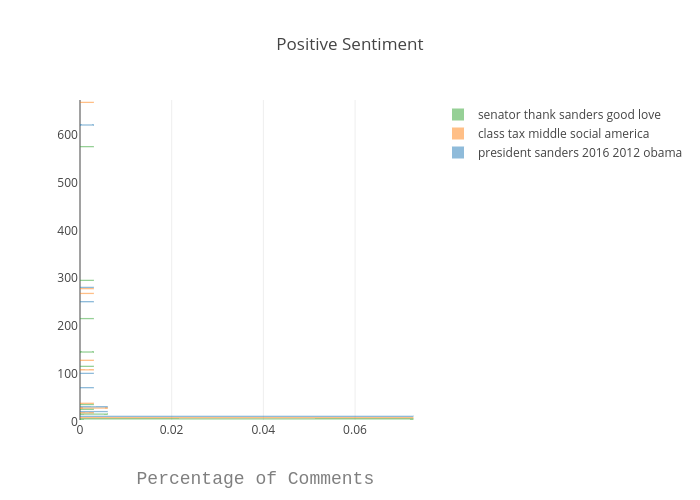

In [72]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth=0.2 ):
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1) )
    return kde.evaluate(x_grid)

x_grid = np.linspace(df['president sanders 2016 2012 obama'].min(), df['president sanders 2016 2012 obama'].max(), 100)
#y_grid = np.linspace(df['PetalLength'].min(), df['PetalLength'].max(), 100)

trace2s = Scatter(
    x=x_grid, 
    y=kde_scipy( df['SepalWidth'].as_matrix(), x_grid ),
    yaxis='y2',
    line = Line( color='rgb(31, 119, 180)' ),
    fill='tonexty',
)

traces = []

legend = {0:False, 1:False, 2:False, 3:True}

colors = {'president sanders 2016 2012 obama': 'rgb(31, 119, 180)', 
          'class tax middle social america': 'rgb(255, 127, 14)', 
          'senator thank sanders good love': 'rgb(44, 160, 44)'}

for key in colors:
    traces.append(Histogram(
                    y=time_frame[key], 
                    histnorm='probability density',
                    opacity=0.5,
                    marker=Marker(color=colors[key]),
                    name=key,
                    nbinsy=100
                    ))

data = Data(traces)

layout = Layout( 
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))

fig = Figure(data=data, layout=layout)
py.iplot(fig)